In [ ]:
#Testing serialization of scenario

from .scenario_generator import ScenarioGenerator
import scenario_generator
sg = ScenarioGenerator(750,751)

int_list = list(range(90,110,10))
str_list = [str(x) for x in int_list]


for scenario_name in str_list:
    for x in range(10):
        target_percentage = int(scenario_name)/100
        moves = sg.generateScenario_one_containe_per_hour(target_percentage)
        scenario_generator.serialize_scenario(moves, f"0_congestion_{scenario_name}_accuracy_{x}")


# moves, scenario_name = sg.generateScenario_one_containe_per_hour()

# print(moves)
# print(scenario_name)
# scenario_generator.serialize_scenario(moves, scenario_name)

# #testing deserialization of scenario

# deserialized_moves = scenario_generator.deserialize_scenario(scenario_name)
# print(deserialized_moves)
# # print(deserialized_moves['target_percentage'])


In [ ]:
#testing deserialization of scenario



In [ ]:
int_list = list(range(0,100,10))
str_list = [str(x) for x in int_list]

print(str_list)

In [ ]:
val = 0.7

val_str = str(val)

print(val_str)

In [ ]:
from scenario_generator import ScenarioGenerator
import scenario_generator
int_list = list(range(10,110,10))
str_list = [str(x) for x in int_list]
n_blocks = 5
n_rows = 5
n_stacks = 5
stack_height = 6
n_containers = 375
time_scale = 751
n_tests = 10
target_percentages = str_list
initial_congestions = ['50']
sg = ScenarioGenerator(n_blocks,n_rows,n_stacks,stack_height,n_containers, time_scale,n_tests, target_percentages, initial_congestions)
sg.generate_scenarios()


In [ ]:
for i in range(1):
    print(i)
    print(type(i))

In [ ]:
import containerClass

container_dict ={
                    "container_number": "ISO_4",
                    "dwell_time": 1,
                    "synthetic_dwell_time": 1,
                    "container_location": "A001"
                }

container = containerClass.deserialize(container_dict)

print(container.__dict__)

In [ ]:
accuracy_ints = list(range(10,110,10))
accuracy_strs = [str(x) for x in accuracy_ints]
print(accuracy_strs)

In [ ]:
import math
import matplotlib.pyplot as plt

def even_distribution(min,max,n_items):
    n_bins = (max-min)+1
    items_per_bin = int(math.floor(n_items/n_bins))

    final_array = []
    for x in range(min,max+1):
        final_array+=[x]*items_per_bin
    
    return final_array

a = even_distribution(1,1,1000)

plt.hist(a)

maximum: 138, minimum: 42
total_n: 142857.14285714287, remaining_n: 42857.14285714287, half_remaining_n 21428
min_value_lower_fill: 1, max_value_lower_fill: 41
min_value_upper_fill: 138, max_value_upper_fill: 186
121


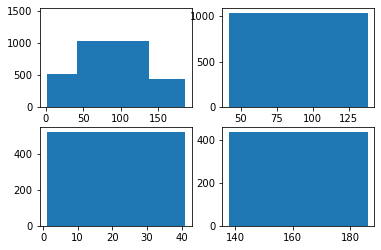

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

def even_distribution(min,max,n_items):
    n_bins = (max-min)+1
    items_per_bin = int(math.floor(n_items/n_bins))

    final_array = []
    for x in range(min,max+1):
        final_array+=[x]*items_per_bin


    return final_array

def random_choice_histogram_even(dwell_time, target_percentage):
    n = 100000

    maximum = dwell_time+48
    minimum = dwell_time-48


    if minimum<1: minimum = 1
    print(f"maximum: {maximum}, minimum: {minimum}")
    even_distribution_middle = even_distribution(minimum, maximum,n)

    total_n = n/target_percentage
    remaining_n = total_n -n
    half_remaining_n = math.floor(remaining_n/2)
    print(f"total_n: {total_n}, remaining_n: {remaining_n}, half_remaining_n {half_remaining_n}")

    #lower bound even fill
    min_value_lower_fill = minimum- 48
    if min_value_lower_fill <1: min_value_lower_fill=1

    max_value_lower_fill = minimum-1
    if max_value_lower_fill<1:max_value_lower_fill = 1
    print(f"min_value_lower_fill: {min_value_lower_fill}, max_value_lower_fill: {max_value_lower_fill}")
    lower_fill = even_distribution(min_value_lower_fill,max_value_lower_fill,half_remaining_n)

    #upper bound even fill
    min_value_upper_fill = maximum

    max_value_upper_fill = maximum+48
    print(f"min_value_upper_fill: {min_value_upper_fill}, max_value_upper_fill: {max_value_upper_fill}")
    upper_fill = even_distribution(min_value_upper_fill,max_value_upper_fill,half_remaining_n)


    total_array = even_distribution_middle+lower_fill+upper_fill


    fig, axs = plt.subplots(2, 2)
    axs[0,0].hist(total_array,bins =(max_value_upper_fill- min_value_lower_fill)+1)
    axs[0,1].hist(even_distribution_middle,bins = (maximum - minimum)+1)
    axs[1,0].hist(lower_fill,bins = (max_value_lower_fill-min_value_lower_fill)+1)
    axs[1,1].hist(upper_fill,bins = (max_value_upper_fill-min_value_upper_fill)+1)

    return random.choice(total_array)

z = random_choice_histogram_even(90,0.70)

print(z)

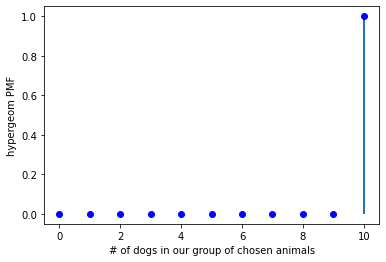

In [4]:
import numpy as np

from scipy.stats import hypergeom

import matplotlib.pyplot as plt

[M, n, N] = [100, 10, 100]

rv = hypergeom(M, n, N)

x = np.arange(0, n+1)

pmf_dogs = rv.pmf(x)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, pmf_dogs, 'bo')

ax.vlines(x, 0, pmf_dogs, lw=2)

ax.set_xlabel('# of dogs in our group of chosen animals')

ax.set_ylabel('hypergeom PMF')

plt.show()

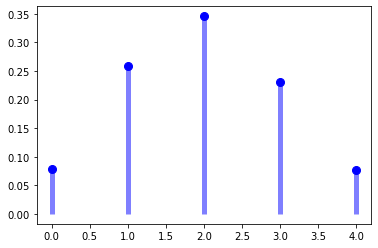

In [5]:
import numpy as np

from scipy.stats import binom

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

n, p = 5, 0.4

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),

              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')

ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

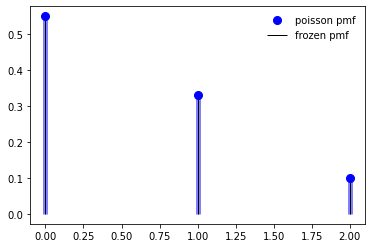

In [6]:
import numpy as np

from scipy.stats import poisson

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

mu = 0.6
loc = 58
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk', loc= loc)

x = np.arange(poisson.ppf(0.01, mu),

              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')

ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

rv = poisson(mu)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,

        label='frozen pmf')

ax.legend(loc='best', frameon=False)

plt.show()

In [ ]:
import numpy as np

from scipy.stats import poisson

import matplotlib.pyplot as plt

lol = poisson.pmf(k, mu, loc=0)

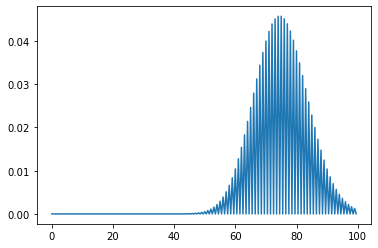

In [11]:
# importing poisson from scipy
from scipy.stats import poisson
 
# importing numpy as np
import numpy as np
 
# importing matplotlib as plt
import matplotlib.pyplot as plt
 
 
# creating a numpy array for x-axis
x = np.arange(0, 100, 0.5)
 
# poisson distribution data for y-axis
y = poisson.pmf(x, mu=76, loc=0-1)
 
 
# plotting the graph
plt.plot(x, y)
 
# showing the graph
plt.show()

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import randint



def random_choice_histogram_even(dwell_time, target_percentage):
    n = 10000

    interval_assumption_range = 120 # 5days 

    maximum = dwell_time+48
    minimum = dwell_time-48

    absolute_minimum = minimum - interval_assumption_range
    absolute_maximum = maximum + interval_assumption_range
    if absolute_minimum<1:
            absolute_minimum = 1

    if minimum<1: minimum = 1
    print(f"maximum: {maximum}, minimum: {minimum}")
    even_distribution_middle = list(randint.rvs(minimum, maximum, size=n))

    total_n = n/target_percentage
    remaining_n = math.floor(total_n -n)

    #the remaining amount should be distributed on either side of the maximum/minimum range
    
    if minimum == 1:
        #all remaining values should be above maximum
        starting_int = maximum+1
        even_distribution_right = list(randint.rvs(starting_int, absolute_maximum, size=remaining_n))
        total_array = even_distribution_middle + even_distribution_right
        even_distribution_left = []
    else:

        #take the ratio of left bins to right bins to assing remaining_n

        n_bins_on_left = minimum-absolute_minimum
        n_bins_on_right = absolute_maximum-maximum

        ratio_bins_left_to_right = n_bins_on_left/n_bins_on_right

        n_samples_on_left = math.floor(ratio_bins_left_to_right*remaining_n)
        n_samples_on_right = remaining_n-n_samples_on_left

        even_distribution_left = list(randint.rvs(absolute_minimum, minimum, size=n_samples_on_left))
        even_distribution_right = list(randint.rvs(maximum+1, absolute_maximum, size=n_samples_on_right))


        total_array = even_distribution_left + even_distribution_middle +even_distribution_right


    fig, axs = plt.subplots(2, 2)
    axs[0,0].hist(total_array,bins =(absolute_maximum-absolute_minimum))
    axs[0,1].hist(even_distribution_middle,bins = (maximum - minimum))
    axs[1,0].hist(even_distribution_right,bins = (absolute_maximum-maximum)-1)
    if even_distribution_left:
        axs[1,1].hist(even_distribution_left,bins = (minimum-absolute_minimum)-1)

    return random.choice(total_array).item()

z = random_choice_histogram_even(50,0.1)

print(z)
print(type(z))

maximum: 98, minimum: 2


ValueError: Domain error in arguments.

(array([1016., 1046., 1093., 1013.,  994., 1090., 1057., 1000., 1030.,
        1092., 1041., 1091., 1052., 1021., 1018., 1051., 1056., 1047.,
        1053., 1080., 1011., 1085., 1023., 1114., 1098., 1098., 1070.,
        1016., 1051., 1020., 1055., 1016., 1063., 1045., 1014., 1057.,
        1009.,  995.,  994.,  991., 1078., 1077., 1030., 1058., 1095.,
        1040., 1060., 1024., 1049., 1023., 1046., 1101., 1038., 1066.,
        1036., 1010., 1116.,  990., 1058., 1006., 1077., 1039., 1006.,
         985., 1018., 1075., 1039., 1054., 1038., 1094., 1072.,  990.,
        1101., 1003., 1005.,  999., 1004., 1042., 1028., 1085.,  979.,
        1037., 1043., 1039., 1057., 1039., 1018., 1041., 1036., 1012.,
         977., 1032., 1055., 1060., 1027., 1027.]),
 array([ 10.        ,  10.98958333,  11.97916667,  12.96875   ,
         13.95833333,  14.94791667,  15.9375    ,  16.92708333,
         17.91666667,  18.90625   ,  19.89583333,  20.88541667,
         21.875     ,  22.86458333,  23.854166

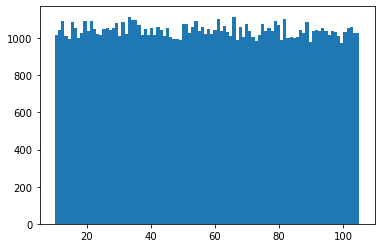

In [26]:
import numpy as np

from scipy.stats import randint

import matplotlib.pyplot as plt

r = list(randint.rvs(10, 106, size=100000))

plt.hist(r,bins = 96)

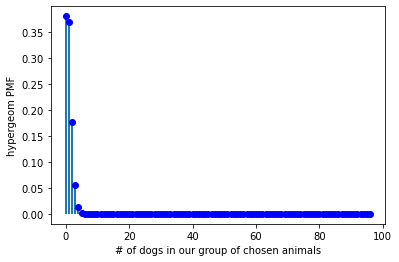

In [31]:
import numpy as np

from scipy.stats import hypergeom

import matplotlib.pyplot as plt

[M, n, N] = [100000, 96, 1000]

rv = hypergeom(M, n, N)

x = np.arange(0, n+1)

pmf_dogs = rv.pmf(x)


fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, pmf_dogs, 'bo')

ax.vlines(x, 0, pmf_dogs, lw=2)

ax.set_xlabel('# of dogs in our group of chosen animals')

ax.set_ylabel('hypergeom PMF')

plt.show()

In [12]:
a = list(randint.rvs(1, 2, size=5))
print(a)

[1, 1, 1, 1, 1]


Text(180, 79.4, 'avg. = 54')

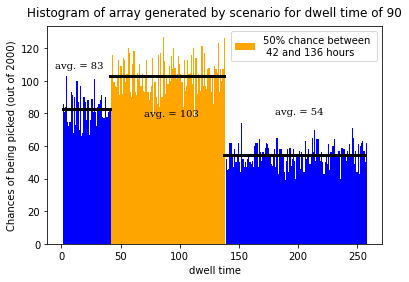

In [54]:
import numpy as np
import statistics
from scipy.stats import randint

import matplotlib.pyplot as plt
from collections import Counter
def random_choice_histogram_5_day_range(dwell_time, target_percentage):
    n = 10000

    interval_assumption_range = 120 # 5days 

    maximum = dwell_time+48
    minimum = dwell_time-48

    absolute_minimum = minimum - interval_assumption_range
    absolute_maximum = maximum + interval_assumption_range
    if absolute_minimum<1:
            absolute_minimum = 1

    if minimum<1: minimum = 1
    # print(f"maximum: {maximum}, minimum: {minimum}")
    even_distribution_middle = list(randint.rvs(minimum, maximum+1, size=n))

    total_n = n/target_percentage
    remaining_n = total_n -n

    #the remaining amount should be distributed on either side of the maximum/minimum range
    
    if minimum == 1:
        #all remaining values should be above maximum
        starting_int = maximum+1
        remaining_n = math.floor(remaining_n)
        even_distribution_right = list(randint.rvs(starting_int, absolute_maximum+1, size=remaining_n))
        total_array = even_distribution_middle + even_distribution_right
        even_distribution_left = []
    else:

        #take the ratio of left bins to right bins to assing remaining_n

        n_bins_on_left = minimum-absolute_minimum+1
        n_bins_on_right = absolute_maximum-maximum+1

        ratio_bins_left_to_right = n_bins_on_left/n_bins_on_right

        n_samples_on_left = ratio_bins_left_to_right*remaining_n
        n_samples_on_right = remaining_n-n_samples_on_left

        n_samples_on_left = math.floor(n_samples_on_left)
        n_samples_on_right = math.floor(n_samples_on_right)

        even_distribution_left = list(randint.rvs(absolute_minimum, minimum+1, size=n_samples_on_left))
        even_distribution_right = list(randint.rvs(maximum+1, absolute_maximum+1, size=n_samples_on_right))


        total_array = even_distribution_left + even_distribution_middle +even_distribution_right

    return even_distribution_middle, even_distribution_left, even_distribution_right

middle,left,right = random_choice_histogram_5_day_range(90,.5)

fig,axs = plt.subplots()

axs.set_xlabel("dwell time")
axs.set_ylabel("Chances of being picked (out of 2000)")
axs.set_title("Histogram of array generated by scenario for dwell time of 90", pad = 10)
axs.hist(left,bins =42,color = 'blue')
axs.hist(middle, bins = 97, color = 'orange',label = '50% chance between \n 42 and 136 hours')
axs.hist(right,bins = 120,color= 'blue')
axs.legend(bbox_to_anchor=(1.0, 1.0))
average_left = statistics.mean(Counter(left).values())
average_middle = statistics.mean(Counter(middle).values())
average_right = statistics.mean(Counter(right).values())

axs.plot([1,41],[average_left,average_left],color = 'black',linewidth = 3)
axs.plot([41,137],[average_middle,average_middle],color = 'black',linewidth = 3)
axs.plot([137,256],[average_right,average_right],color = 'black',linewidth = 3)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10
        }

axs.text(-5,average_left+25,f"avg. = {round(average_left)}",fontdict=font)
axs.text(70,average_middle-25,f"avg. = {round(average_middle)}",fontdict=font)
axs.text(180,average_right+25,f"avg. = {round(average_right)}",fontdict=font)

# fig.savefig('dwell_time_histogram.eps', format='eps')